In [34]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
data = keras.datasets.imdb

In [36]:
max_word = 10000  # 考虑前10000个最常用的单词

In [37]:
# x是数据，y是标签
(x_train, y_train), (x_test, y_test) = data.load_data(num_words = max_word)

x_train.shape, x_test.shape

((25000,), (25000,))

In [38]:
x_train[0], len(x_train[0])

([1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  1029,
  

# 词嵌入处理：

In [39]:
# 把长度不同的评论(训练+测试)，填充为长度相同：
maxlen = 200  # 填充的最大长度
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [40]:
x_train.shape, x_test.shape   # 每一句话，又转为一个长度为200的一维数组里

((25000, 200), (25000, 200))

In [41]:
x_train[0], len(x_train[0])

(array([   5,   25,  100,   43,  838,  112,   50,  670,    2,    9,   35,
         480,  284,    5,  150,    4,  172,  112,  167,    2,  336,  385,
          39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,    4,
         192,   50,   16,    6,  147, 2025,   19,   14,   22,    4, 1920,
        4613,  469,    4,   22,   71,   87,   12,   16,   43,  530,   38,
          76,   15,   13, 1247,    4,   22,   17,  515,   17,   12,   16,
         626,   18,    2,    5,   62,  386,   12,    8,  316,    8,  106,
           5,    4, 2223, 5244,   16,  480,   66, 3785,   33,    4,  130,
          12,   16,   38,  619,    5,   25,  124,   51,   36,  135,   48,
          25, 1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,
          14,  407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,
         256,    4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,
         476,   26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,
          88,    4,  381,   15,  297, 

# 模型创建：

In [42]:
model = keras.Sequential()

In [43]:
from keras import layers

In [44]:
# 先加入一个“词嵌入层”：把每一个“单词（注意这里是每个单词，上面是每句话）”映射到一个高维向量中。
# 原先有10000个单词，每个单词映射为一个长度为16的向量；input_length是输入数据的长度（输入的虽然是一句话，但其实就是200个单词）
model.add( layers.Embedding(10000, 16, input_length=maxlen) )
# 经过这一层之后，输出的数据应该变成了三维数据：[10000, 200, 16] —— 200是有200个单词，16是每个单词转换后的长度为16的向量！

In [45]:
model.output_shape  

(None, 200, 16)

In [46]:
# 上一层是一个三维数据，要想放入Dense层就需要Flatten()
model.add( layers.Flatten() )
model.add( layers.Dense(128, activation='relu') )
model.add( layers.Dense(1, activation='sigmoid') )  # 二分类

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               409728    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 569,857
Trainable params: 569,857
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile( optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['acc']  # 因为metrics里面可以算很多东西，所以用列表
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [49]:
history = model.fit( x_train, y_train, epochs = 15, batch_size = 256, validation_data = (x_test, y_test) )


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 2s 95us/step - loss: 0.5335 - acc: 0.7096 - val_loss: 0.3263 - val_acc: 0.8561
Epoch 2/15
25000/25000 [==============================] - 2s 72us/step - loss: 0.2218 - acc: 0.9124 - val_loss: 0.2939 - val_acc: 0.8754
Epoch 3/15
25000/25000 [==============================] - 2s 74us/step - loss: 0.1042 - acc: 0.9681 - val_loss: 0.3364 - val_acc: 0.8674
Epoch 4/15
25000/25000 [==============================] - 2s 76us/step - loss: 0.0368 - acc: 0.9934 - val_loss: 0.3955 - val_acc: 0.8662
Epoch 5/15
25000/25000 [==============================] - 2s 82us/step - loss: 0.0123 - acc: 0.9990 - val_loss: 0.4381 - val_acc: 0.8654
Epoch 6/15
25000/25000 [==============================] - 2s 75us/step - loss: 0.0052 - acc: 0.9998 - val_loss: 0.4757 - val_acc: 0.8634
Epoch 7/15
25000/25000 [==============================] - 2s 68us/step - loss: 0.0028 - acc: 0.9999 - val_loss: 0.4992 - val_ac

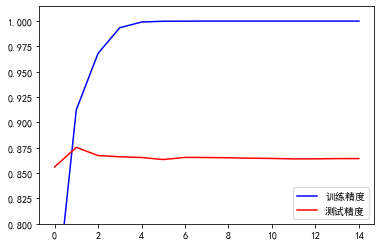

In [50]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False    # 步骤二（解决坐标轴负数的负号显示问题）
# 训练精度与测试精度的对比图：
plt.plot( history.epoch, history.history.get('acc'), c = 'b', label = '训练精度' )
plt.plot( history.epoch, history.history.get('val_acc'), c = 'r', label = '测试精度' )
plt.ylim( ymin=0.8 )
plt.legend()